<a href="https://colab.research.google.com/github/muxeres/Computa-oNatural/blob/master/C%C3%B3pia_de_Computa%C3%A7%C3%A3o_Natural_V%C3%ADdeo_aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credits to WIRSANKY et al (2020)

WIRSANSKY, Eyal. Hands-on genetic algorithms with Python: applying genetic algorithms to solve real-world deep learning and artificial intelligence problems. Packt Publishing Ltd, 2020.

Original code: https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/blob/master/Chapter03/02-OneMax-short.py



In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.3 MB/s eta 0:00:00


In [ ]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns



## PARAMETROS DE ENTRADA

In [ ]:

ONE_MAX_LENGTH = 100  # tamanho do vetor a ser otimizado (string com 100 caracteres)

POPULATION_SIZE = 200 # tamanho da população
P_CROSSOVER = 0.9  # probabilidade de um cruzamento
P_MUTATION = 0.1   # probabilidade de uma mutação
MAX_GENERATIONS = 50 # número máximo de gerações (quantidade de ciclos do algoritmo)

RANDOM_SEED = 42 # para replicabilidade
random.seed(RANDOM_SEED)

## FUNÇÕES

https://deap.readthedocs.io/en/master/tutorials/basic/part1.html

Vetor de 100 elementos com valores entre 0 e 1:
 [0, 1, 0, 1, ........., 1]

## Fitness

In [ ]:
# define que teremos uma única função objetivo, maximizando o fitness


creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# exemplo de minimização do fitness
# creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

### Indivíduos

In [ ]:
# o indivíduo é composto de uma lista, herdando do tipo de dado LISTA, tendo um atributo de fitness

creator.create("Individual", list, fitness = creator.FitnessMax)

In [ ]:
toolbox = base.Toolbox()

# são criadas duas funções/comandos na toolbox "zeroOrOne" e "individualCreator"

# operador que retorna 0 ou 1, é usado para criar a população
toolbox.register("zeroOrOne", random.randint, 0, 1) # random.randint(0,1)

# operador que preenche os dados do indivíduo
# initRepeat() - chama a função N vezes e retorna o resultado em um container do tipo container

toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

In [ ]:
random.randint(0,1)

0

### População

In [ ]:
# cria o operador da população para gerar a lista de individuos
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)



In [ ]:
toolbox.populationCreator(n=2)

[[0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1],
 [1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0]

In [ ]:
len(toolbox.populationCreator(n=2))

2

In [ ]:
len(toolbox.populationCreator(n=2)[1])

100

### Função de fitness

In [ ]:
# soma todos os valores dos vetores (valor máximo da soma igual a 100)
def oneMaxFitness(individual):
    return sum(individual),

In [ ]:

toolbox.register("evaluate", oneMaxFitness) # indicando a operador para avaliação

### Operadores Genéticos

In [ ]:
# seleção por torneio com tamanho de 3 participantes
toolbox.register("select", tools.selTournament, tournsize=3)

# cruzamento de ponto único
toolbox.register("mate", tools.cxOnePoint)

# mutação por troca de bit, com a probabilidade de mudança de cada atributo sendo definida por indpd
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

# documentação: os nomes usuais para ferramentas evolucionárias são mate(), mutate(), evaluate() e select()


## ALGORITMO

In [ ]:
# cria uma população inicial (geração 0)
population = toolbox.populationCreator(n=POPULATION_SIZE)

# seleciona quais estatísticas necessitamos
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

# roda o algoritmo genético
population, logbook = algorithms.eaSimple(population, toolbox, cxpb= P_CROSSOVER, mutpb= P_MUTATION, ngen= MAX_GENERATIONS, stats= stats, verbose= True)


gen	nevals	max	avg   
0  	200   	60 	49.665
1  	178   	65 	53.615
2  	192   	66 	56.88 
3  	184   	68 	60    
4  	189   	72 	62.79 
5  	187   	76 	65.585
6  	188   	76 	67.965
7  	187   	77 	70.27 
8  	182   	79 	72.3  
9  	189   	79 	74.23 
10 	178   	80 	76.015
11 	181   	82 	77.455
12 	170   	82 	78.63 
13 	174   	85 	79.97 
14 	190   	86 	81.225
15 	177   	87 	82.445
16 	185   	88 	83.535
17 	173   	88 	84.685
18 	196   	90 	85.8  
19 	173   	90 	87.01 
20 	168   	91 	88.04 
21 	180   	92 	88.79 
22 	194   	93 	89.605
23 	178   	93 	90.35 
24 	170   	94 	91.27 
25 	192   	95 	91.915
26 	181   	95 	92.61 
27 	184   	96 	93.22 
28 	184   	96 	93.89 
29 	179   	96 	94.375
30 	183   	96 	94.79 
31 	180   	96 	95.055
32 	189   	96 	95.235
33 	177   	97 	95.61 
34 	188   	98 	95.91 
35 	169   	98 	96.365
36 	182   	99 	96.695
37 	183   	99 	97.23 
38 	182   	99 	97.67 
39 	192   	99 	98.05 
40 	173   	99 	98.345
41 	182   	99 	98.675
42 	176   	99 	98.855
43 	188   	99 	98.91 
44 	192   

## ESTATÍSTICAS

In [ ]:
# estatísticas
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

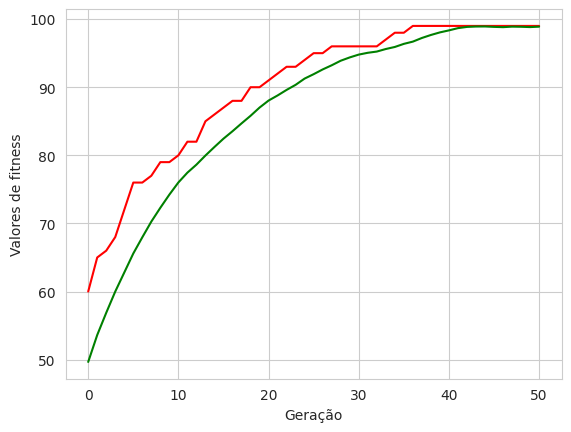

In [ ]:
# gráfico:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Geração')
plt.ylabel('Valores de fitness')
plt.show()